# Web Scraping

In [129]:
import pandas as pd
import seaborn as sns
from requests import get
from bs4 import BeautifulSoup
#All examples found on the at the following web addresses
#https://www.dataquest.io/blog/web-scraping-beautifulsoup/
#https://www.dataquest.io/blog/web-scraping-tutorial-python/
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:500])





<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


# Simple example

In [130]:
page = get("http://dataquestio.github.io/web-scraping-pages/simple.html")
print(page)
print(page.status_code)
print(page.content)

<Response [200]>
200
b'<!DOCTYPE html>\n<html>\n    <head><style>ytd-live-chat-frame#chat { display: none; }</style><style>#watch-discussion, #watch7-discussion, ytd-comments { display: none; }</style>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'


In [131]:
soup = BeautifulSoup(page.content, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [132]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <style>
   ytd-live-chat-frame#chat { display: none; }
  </style>
  <style>
   #watch-discussion, #watch7-discussion, ytd-comments { display: none; }
  </style>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>


In [133]:
list(soup.children)

print([type(item) for item in list(soup.children)])
 
html = list(soup.children)[1]
print(html)

[<class 'bs4.element.Doctype'>, <class 'bs4.element.NavigableString'>, <class 'bs4.element.Tag'>]




In [134]:
body = list(soup.children)[2]
print(body)
list(body.children)
print(list(body.children)[1])

<html>
<head><style>ytd-live-chat-frame#chat { display: none; }</style><style>#watch-discussion, #watch7-discussion, ytd-comments { display: none; }</style>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>
<head><style>ytd-live-chat-frame#chat { display: none; }</style><style>#watch-discussion, #watch7-discussion, ytd-comments { display: none; }</style>
<title>A simple example page</title>
</head>


In [135]:
p = list(body.children)[1]
print(p.get_text())


ytd-live-chat-frame#chat { display: none; }#watch-discussion, #watch7-discussion, ytd-comments { display: none; }
A simple example page



# Finding all instances of a tag

In [136]:
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('p')

[<p>Here is some simple content for this page.</p>]

In [137]:
soup.find('p')

<p>Here is some simple content for this page.</p>

In [138]:
divs = soup.find_all('div')
print(divs)

[]


# Data extraction tutorial from website

In [139]:
imdb_page = get("http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=12")
imdb_soup = BeautifulSoup(imdb_page.content, 'html.parser')

movie_containers = imdb_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [140]:
#print(movie_containers)

# Extract data from each of the movies to build a dataframe

In [141]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
    # The name
        name = container.h3.a.text
        names.append(name)
    # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
    # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
    # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
    # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [142]:
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
movie        44 non-null object
year         44 non-null object
imdb         44 non-null float64
metascore    44 non-null int64
votes        44 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,565490
1,Wonder Woman,(2017),7.5,76,490721
2,Thor: Ragnarok,(2017),7.9,74,489550
3,Guardians of the Galaxy: Vol. 2,(2017),7.7,67,488727
4,Dunkirk,(2017),7.9,94,470402
5,Star Wars: Episode VIII - The Last Jedi,(2017),7.1,85,465634
6,Spider-Man: Homecoming,(2017),7.5,73,432953
7,Get Out,(I) (2017),7.7,84,405896
8,Blade Runner 2049,(2017),8.0,81,378994
9,Baby Driver,(2017),7.6,86,368946


#  Set data and page ranges for multiple extracts

In [143]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [144]:
from time import sleep
from random import randint

from time import time
start_time = time()
counter = 0
for _ in range(5):
# A request would go here
    counter += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(counter, counter/elapsed_time))

Request: 1; Frequency: 0.9990826922779174 requests/s
Request: 2; Frequency: 0.6664468642483846 requests/s
Request: 3; Frequency: 0.5998544092682278 requests/s
Request: 4; Frequency: 0.4999087768363783 requests/s
Request: 5; Frequency: 0.5554496707961016 requests/s


In [145]:
from IPython.core.display import clear_output
start_time = time()
counter = 0
for _ in range(5):
# A request would go here
    counter  += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(counter, counter  += 1/elapsed_time))
    clear_output(wait = True)

Request: 5; Frequency: 0.4995779146537403 requests/s


In [146]:
from warnings import warn
warn("Warning Simulation")


C:\Users\g_osm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Warning Simulation
  


# Running multiple requests to grab data over a range of years (limited to 72 requests)

In [147]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
counter = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        counter += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(counter, counter/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(counter, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if counter > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:72; Frequency: 0.07512587545484606 requests/s


# Create a dataframe

In [148]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 5 columns):
movie        3280 non-null object
year         3280 non-null object
imdb         3280 non-null float64
metascore    3280 non-null int64
votes        3280 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 128.2+ KB
None


,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1218027
1,Memento,(2000),8.5,80,1034759
2,Snatch,(2000),8.3,55,721766
3,Requiem for a Dream,(2000),8.3,68,703014
4,X-Men,(2000),7.4,64,538591
5,Cast Away,(2000),7.8,73,474574
6,American Psycho,(2000),7.6,64,433151
7,Unbreakable,(2000),7.3,62,354130
8,Meet the Parents,(2000),7.0,73,293716
9,Mission: Impossible II,(2000),6.1,59,291848


In [149]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1218027
1,Memento,(2000),8.5,80,1034759
2,Snatch,(2000),8.3,55,721766
3,Requiem for a Dream,(2000),8.3,68,703014
4,X-Men,(2000),7.4,64,538591


# unique years

In [150]:
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)',
       '(2012)', '(I) (2012)', '(2013)', '(I) (2013)', '(2014)',
       '(I) (2014)', '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)',
       '(2016)', '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(2017)',
       '(I) (2017)'], dtype=object)

# Movie years

In [151]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [152]:
movie_ratings['year'].head(3)

0    2000
1    2000
2    2000
Name: year, dtype: int32

# Max/Min Movie Rating

In [153]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,24.0
max,9.0,100.0


# movie rating percentage

In [154]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1218027,85.0
1,Memento,2000,8.5,80,1034759,85.0
2,Snatch,2000,8.3,55,721766,83.0


In [155]:
movie_ratings.to_csv('movie_ratings.csv')

# plotting the data

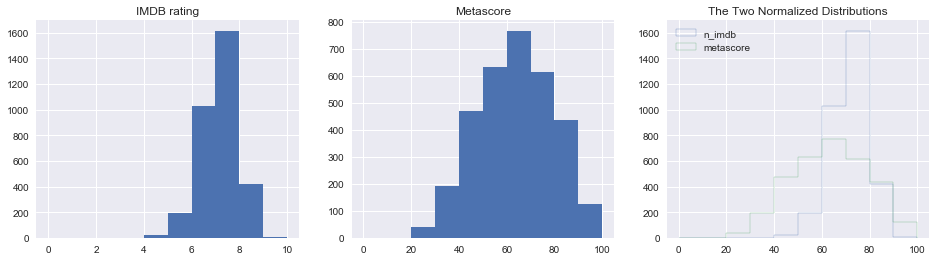

In [156]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

# Find ratings and votes

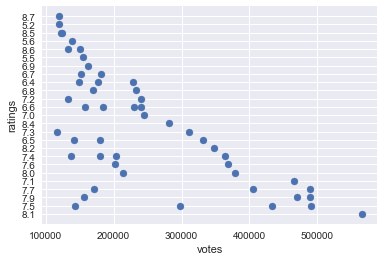

In [157]:
import matplotlib.pyplot as plt

sns.set()

votes=[]
ratings=[]
for div in movie_containers:
    nv = div.find('span', attrs = {'name':'nv'})
    rating = div.find('strong').text
    votes.append(int(nv['data-value']))
    ratings.append(rating)
    
_=plt.scatter(votes, ratings)
_=plt.ylabel('ratings')
_=plt.xlabel('votes')
plt.show()


# And now for the weather...

In [159]:
weather_page = get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(weather_page.content, 'html.parser')
seven_day = soup.find(id="seven-day-forecast")
forecast_items = seven_day.find_all(class_="tombstone-container")
tonight = forecast_items[0]
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  Today
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Today: Cloudy, then gradually becoming mostly sunny, with a high near 68. Light south southwest wind becoming west southwest 8 to 13 mph in the afternoon. " class="forecast-icon" src="newimages/medium/bkn.png" title="Today: Cloudy, then gradually becoming mostly sunny, with a high near 68. Light south southwest wind becoming west southwest 8 to 13 mph in the afternoon. "/>
 </p>
 <p class="short-desc">
  Decreasing
  <br/>
  Clouds
 </p>
 <p class="temp temp-high">
  High: 68 °F
 </p>
</div>


In [160]:
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
temp = tonight.find(class_="temp").get_text()
print(period)
print(short_desc)
print(temp)

Today
DecreasingClouds
High: 68 °F


In [161]:
img = tonight.find("img")
desc = img['title']
print(desc)

Today: Cloudy, then gradually becoming mostly sunny, with a high near 68. Light south southwest wind becoming west southwest 8 to 13 mph in the afternoon. 


In [162]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['Today',
 'Tonight',
 'Sunday',
 'SundayNight',
 'Monday',
 'MondayNight',
 'Tuesday',
 'TuesdayNight',
 'Wednesday']

In [165]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
print(short_descs)
print(temps)
print(descs)

['DecreasingClouds', 'IncreasingClouds', 'Partly Sunny', 'IncreasingClouds', 'Mostly Cloudy', 'Mostly Cloudy', 'Partly Sunny', 'Mostly Clear', 'Sunny']
['High: 68 °F', 'Low: 55 °F', 'High: 65 °F', 'Low: 55 °F', 'High: 64 °F', 'Low: 55 °F', 'High: 67 °F', 'Low: 58 °F', 'High: 68 °F']
['Today: Cloudy, then gradually becoming mostly sunny, with a high near 68. Light south southwest wind becoming west southwest 8 to 13 mph in the afternoon. ', 'Tonight: Increasing clouds, with a low around 55. West wind around 15 mph, with gusts as high as 20 mph. ', 'Sunday: Partly sunny, with a high near 65. West southwest wind 13 to 16 mph, with gusts as high as 21 mph. ', 'Sunday Night: Increasing clouds, with a low around 55. West southwest wind 13 to 16 mph, with gusts as high as 22 mph. ', 'Monday: Mostly cloudy, with a high near 64. West southwest wind 8 to 13 mph. ', 'Monday Night: Mostly cloudy, with a low around 55.', 'Tuesday: Partly sunny, with a high near 67.', 'Tuesday Night: Mostly clear, w

# Build the data frame

In [166]:
weather = pd.DataFrame({
"period": periods,
"short_desc": short_descs,
"temp": temps,
"desc":descs
})
weather

,period,short_desc,temp,desc
0,Today,DecreasingClouds,High: 68 °F,"Today: Cloudy, then gradually becoming mostly ..."
1,Tonight,IncreasingClouds,Low: 55 °F,"Tonight: Increasing clouds, with a low around ..."
2,Sunday,Partly Sunny,High: 65 °F,"Sunday: Partly sunny, with a high near 65. Wes..."
3,SundayNight,IncreasingClouds,Low: 55 °F,"Sunday Night: Increasing clouds, with a low ar..."
4,Monday,Mostly Cloudy,High: 64 °F,"Monday: Mostly cloudy, with a high near 64. We..."
5,MondayNight,Mostly Cloudy,Low: 55 °F,"Monday Night: Mostly cloudy, with a low around..."
6,Tuesday,Partly Sunny,High: 67 °F,"Tuesday: Partly sunny, with a high near 67."
7,TuesdayNight,Mostly Clear,Low: 58 °F,"Tuesday Night: Mostly clear, with a low around..."
8,Wednesday,Sunny,High: 68 °F,"Wednesday: Sunny, with a high near 68."


In [167]:
temp_nums = weather["temp"].str.extract("(?P<temp_num>\d+)", expand=False)
weather["temp_num"] = temp_nums.astype('int')
temp_nums

0    68
1    55
2    65
3    55
4    64
5    55
6    67
7    58
8    68
Name: temp_num, dtype: object

In [168]:
weather["temp_num"].mean()

61.666666666666664

In [169]:
is_night = weather["temp"].str.contains("Low")
weather["is_night"] = is_night
is_night

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8    False
Name: temp, dtype: bool

In [170]:
weather[is_night]

,period,short_desc,temp,desc,temp_num,is_night
1,Tonight,IncreasingClouds,Low: 55 °F,"Tonight: Increasing clouds, with a low around ...",55,True
3,SundayNight,IncreasingClouds,Low: 55 °F,"Sunday Night: Increasing clouds, with a low ar...",55,True
5,MondayNight,Mostly Cloudy,Low: 55 °F,"Monday Night: Mostly cloudy, with a low around...",55,True
7,TuesdayNight,Mostly Clear,Low: 58 °F,"Tuesday Night: Mostly clear, with a low around...",58,True
